<a href="https://colab.research.google.com/github/xym-byte/blank-app/blob/main/S25_Lab1_Your_First_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Your First MLP - Hyperparameter Ablation

---



# **Part 1: Understanding Neural Networks**

A neural network is a system designed to learn patterns in data by adjusting its internal parameters. It consists of layers of interconnected nodes (neurons) that transform data as it moves through the network, enabling it to model complex relationships.

Key components, which we cover through this lab, include:

- **Architecture:** The structure of the network, including the number of layers and neurons. These structural choices, often controlled by hyperparameters, define how the network processes and represents data.
- **Loss Function:** A mathematical expression that measures the error in the network’s predictions, guiding the training process to minimize this error.
- **Learning Process:** An iterative adjustment of the network’s parameters to improve its predictions. Hyperparameters play a key role in shaping how effectively this process works.

Neural networks are highly versatile tools, capable of uncovering hierarchical patterns in data and solving a wide range of problems.


## **1. Model Architecture Overview**

The **architecture** of a neural network refers to its structural design—how layers and neurons are arranged and connected. This is a crucial factor in determining the model’s ability to represent data and solve specific problems. Key aspects of architecture include:
- **Layer Arrangement:** How layers are stacked (e.g., deep vs. shallow networks) and the relationships between them (e.g., feedforward vs. recurrent).  
- **Neuron Distribution:** The number of neurons per layer and how it varies across layers. This distribution influences how the model handles complexity and abstraction.  
- **Connections Between Layers:** The way neurons in one layer connect to neurons in another (e.g., fully connected, convolutional layers).


Different **architectural shapes** serve specific tasks and problem domains. For example:
- **Symmetric architectures** (e.g., hourglass-shaped):  
  - Typically have a narrowing middle (bottleneck) for efficient feature compression, followed by expansion to reconstruct or refine data.  
  - Common applications include image segmentation and pose estimation.

- **Hierarchical architectures** (e.g., pyramid-shaped):  
  - Use progressively smaller layers, capturing multi-scale features.  
  - Well-suited for tasks like object detection or image classification, where details need to be processed at different scales.

- **Uniform architectures** (e.g., cylinder-shaped):  
  - Maintain the same number of neurons across layers.  
  - Simpler design often used for sequential or time-dependent data, where the input-output relationship is less complex.


**Why Architecture Matters:**  
The choice of architecture affects a network’s capacity to model complexity and its computational efficiency. Understanding the relationship between architecture and performance is crucial for designing networks that solve specific tasks effectively.


## **2. Measuring Error: Loss Functions in Neural Networks**


Loss functions are critical for training neural networks, as they quantify the discrepancy between the model’s predictions and the true target values. By minimizing the loss, the network learns to improve its predictions over time. In this lab, we focus on classification tasks, using **Cross-Entropy Loss** as the primary metric. However, other loss functions, such as **Mean Squared Error**, are commonly used for different types of tasks.




#### **What is a Loss Function?**
A loss function computes a scalar value that reflects the error between the predicted output $(\hat{y})$ and the true target $(y)$. This scalar drives the optimization process, guiding adjustments to the network’s weights and biases.



#### **Key Loss Functions**

1. **Mean Squared Error (MSE):**  
   Commonly used for regression tasks, MSE calculates the average squared difference between predicted values and true values:
   $$
   \text{MSE}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{k} \sum_{i=1}^k (\hat{y}_i - y_i)^2
   $$
   - **$\hat{y}_i$:** Predicted value for the $i$-th output.  
   - **$y_i$:** True value for the $i$-th output.  
   - **$k$:** Number of outputs.  
   MSE penalizes larger errors more heavily, making it ideal for continuous-value predictions, such as predicting temperatures or stock prices.

2. **Cross-Entropy Loss (CE):**  
   Used for classification tasks, Cross-Entropy Loss measures the dissimilarity between the predicted probability distribution $(\hat{y})$ and the true distribution $(y)$ over $k$ classes:
   $$
   \text{CE}(\hat{\mathbf{y}}, \mathbf{y}) = - \sum_{i=1}^k y_i \log(\hat{y}_i)
   $$
   - **$\hat{y}_i$:** Predicted probability for the $i$-th class.  
   - **$y_i$:** Binary indicator (1 for the correct class, 0 otherwise).  
   Cross-entropy encourages the model to assign higher probabilities to the correct class while penalizing incorrect predictions.

3. **Label Smoothing (Optional):**  
   For classification, **label smoothing** modifies the target distribution slightly to avoid overconfidence:
   $$
   y_i' = (1 - \epsilon) y_i + \frac{\epsilon}{k}
   $$
   - **$\epsilon$:** A small smoothing parameter.  
   This technique can improve generalization by preventing the model from being overly certain.



Understanding loss functions is critical because they provide the feedback necessary to evaluate model performance. For this lab’s classification task, we will use **Cross-Entropy Loss**, but it’s important to recognize the broader utility of loss functions like **MSE** for other applications.


# **Part 2: Hyperparameters & Backprop**

## **1. Hyperparameters Overview**


Hyperparameters are tunable settings that control training. Some of the below hyperparameters are typically fixed as part of the model's design, but can be experimented with during model tuning or ablation studies. They include:
- **Learning Rate:** Controls the size of weight updates during training.
- **Batch Size:** Number of samples used to compute gradients.
- **Regularization:** Reduces overfitting (e.g., dropout, L2 regularization).
- **Activation Functions:** Introduce non-linearity (e.g., ReLU, sigmoid).
- **Number of Epochs:** Determines how many passes the model makes through the training data.
- **Optimizer:** Determines how the model updates its weights during training (e.g., SGD, Adam).
- **Architecture - Number of Hidden Layers and Neurons per Hidden Layer:** Shapes the model architecture by defining its depth and width, controlling the model's ability to learn patterns and generalize.



### **Learning Rate: The Speed of Learning**


The learning rate $(\eta)$ determines how large the steps are during training as the model updates its weights to minimize error.
It directly impacts how quickly the model converges to a solution. Think of it as the speed of a car: too slow, and you’ll take forever
to reach your destination; too fast, and you might miss the turn entirely.


#### **Mathematical Context**

The learning rate is a scaling factor in the weight update rule during gradient descent:

$$
w^{t+1} = w^t - \eta \frac{\partial L}{\partial w}
$$

Where:
- $w^t$: Weights at step $t$.  
- $\eta$: Learning rate.  
- $\frac{\partial L}{\partial w}$: Gradient of the loss function $L$ with respect to the weights.

The learning rate affects how large the updates to the weights are:
- **Low learning rate:** Small, precise steps toward minimizing the loss.  
- **High learning rate:** Large steps that may overshoot the optimal value, leading to instability.


#### **Range of Values and Trade-offs**

| Learning Rate     | Effect                             | Pros                   | Cons                             |
|-------------------|------------------------------------|------------------------|----------------------------------|
| **Low (e.g., 0.001)** | Slow, stable convergence          | Reduces instability    | Requires more epochs            |
| **Optimal (e.g., 0.01)** | Fast and efficient learning      | Balances speed & stability | Requires careful tuning         |
| **High (e.g., 0.1)** | Fast, unstable updates            | Accelerates early progress | Risks divergence or oscillation |


#### **Visualizing Its Effect**


When training with different learning rates:
- **Low Learning Rate:** Loss decreases steadily but requires many epochs to converge.  
- **Optimal Learning Rate:** Loss decreases quickly and stabilizes efficiently.  
- **High Learning Rate:** Loss may oscillate or even diverge.


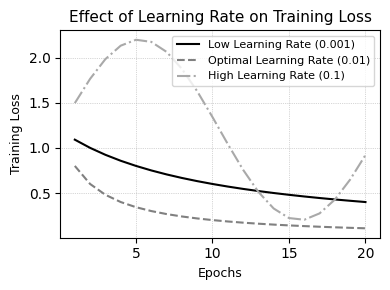

### **Batch Size: The Size of Each Learning Step**  



The batch size determines how many training samples the model processes before updating its weights. It’s a crucial hyperparameter that influences the trade-off between training speed and generalization. Think of batch size as the number of ingredients you prepare at a time when cooking: working with small batches gives you more control, but large batches are faster.



#### **Mathematical Context**  
During training, the model computes the gradient of the loss function over a batch of data. For a batch size $m$, the gradient is:

$$
\frac{\partial L}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L_i}{\partial w}
$$

Where:
- $m$: The batch size.  
- $L_i$: Loss for the $i$-th sample in the batch.

A larger batch size results in smoother, more stable gradients, while a smaller batch size introduces more noise.



#### **Range of Values and Trade-offs**
| Batch Size         | Effect                                     | Pros                     | Cons                              |
|--------------------|-------------------------------------------|--------------------------|-----------------------------------|
| **Small (e.g., 8)**   | Noisy gradients, better generalization    | Requires less memory      | Slower training                   |
| **Moderate (e.g., 32)**| Balanced trade-off between noise and stability | Good generalization      | Longer epochs than large batches  |
| **Large (e.g., 128)**  | Smooth gradients, faster convergence    | Efficient for large datasets | Risks overfitting or poor generalization |




#### **Visualizing Its Effect**  
Imagine plotting the loss curves for models trained with different batch sizes:
- **Small Batch Size:** Loss fluctuates but converges to a better generalization performance.  
- **Large Batch Size:** Loss decreases smoothly but may lead to overfitting if the dataset is small.  



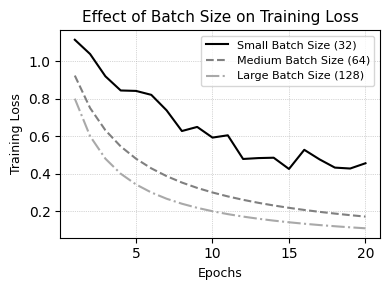

### **Regularization: Preventing Overfitting**  


Regularization helps a model generalize better to unseen data by discouraging overly complex solutions. Think of it as a penalty for “memorizing the training data” rather than learning useful patterns.



#### **Mathematical Context**  
Regularization modifies the loss function to include a penalty term that discourages large weights. The two most common types are **L1** and **L2** regularization:

1. **L1 Regularization (Lasso):**  
   Adds the absolute value of weights as a penalty:

   $$
   L_{\text{new}} = L_{\text{original}} + \lambda \sum |w_i|
   $$

   - Encourages sparsity by driving some weights to exactly zero.  
   - Useful for feature selection.

2. **L2 Regularization (Ridge):**  
   Adds the square of weights as a penalty:

   $$
   L_{\text{new}} = L_{\text{original}} + \lambda \sum w_i^2
   $$

   - Shrinks weights toward zero, making the model more robust without eliminating features.

Here:  
- $L_{\text{original}}$: The original loss function.  
- $\lambda$: The regularization strength (hyperparameter).  
- $w_i$: Individual weights of the model.



#### **Range of Values and Trade-offs**
| Regularization Strength (\(\lambda\)) | Effect                             | Pros                             | Cons                             |
|---------------------------------------|------------------------------------|----------------------------------|----------------------------------|
| **Low $(\lambda = 0)$**             | No regularization applied          | Fits the training data perfectly | Risks overfitting                |
| **Moderate $(\lambda = 0.01)$**     | Slight weight shrinkage            | Balances training and validation performance | Requires tuning                  |
| **High $(\lambda = 0.1)$**          | Strong weight shrinkage            | Prevents overfitting             | Risks underfitting (oversimplifying the model) |



#### **Visualizing Its Effect**
Imagine a simple regression problem with data points scattered around a trend line. Without regularization, the model might overfit, curving to pass through every point. With increasing regularization:
- **No Regularization $(\lambda = 0)$**: The model fits all points, capturing noise.  
- **Moderate Regularization $(\lambda = 0.01)$**: The model smooths out, fitting the general trend.  
- **High Regularization $(\lambda = 0.1)$**: The model oversimplifies, failing to capture important features.



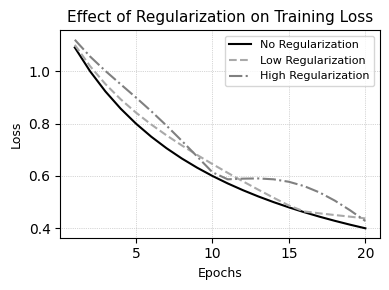

### **Activation Functions: Adding Non-Linearity to Learning**  


Activation functions are essential in neural networks because they introduce non-linearity. Without them, a neural network would essentially become a linear model, no matter how many layers it has. Activation functions enable the network to learn complex patterns and relationships in the data.

Think of activation functions as "decision gates" that decide how much of the input signal passes through to the next layer.



#### **Mathematical Context**  
Each neuron in a neural network computes a weighted sum of its inputs:

$$
z = w \cdot x + b
$$

The activation function $f(z)$ then determines the output:

$$
a = f(z)
$$

Different activation functions have unique properties that affect how the network learns and processes information.



#### **Common Activation Functions and Their Properties**

| **Function**  | **Formula**                          | **Pros**                                | **Cons**                               |
|---------------|--------------------------------------|-----------------------------------------|----------------------------------------|
| **ReLU**      | $f(z) = \max(0, z)$               | Efficient, avoids vanishing gradients   | Can lead to "dead neurons"             |
| **Sigmoid**   | $f(z) = \frac{1}{1 + e^{-z}}$      | Smooth, interpretable output            | Vanishing gradients, slow convergence  |
| **Tanh**      | $f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$ | Scales output between \(-1\) and \(1\)  | Still prone to vanishing gradients     |
| **Softmax**   | $f(z)_i = \frac{e^{z_i}}{\sum_j e^{z_j}}$ | Converts scores into probabilities      | Only used in the output layer          |



#### **Why Activation Functions Matter**
1. **ReLU (Rectified Linear Unit):**  
   - Most commonly used activation function in hidden layers.  
   - Efficient to compute and avoids the vanishing gradient problem seen with sigmoid and tanh.  
   - **Challenge:** Can produce "dead neurons" when $z \leq 0$, as the gradient becomes zero.

2. **Sigmoid and Tanh:**  
   - Useful for tasks requiring bounded outputs (e.g., probabilities for sigmoid).  
   - **Challenge:** Gradients diminish as $z$ moves toward extreme values, slowing learning.

3. **Softmax:**  
   - Converts raw scores into probabilities for multi-class classification problems.  
   - Typically used in the output layer for classification tasks.



#### **Visualizing Activation Functions**  
Here are commonly used activation functions to highlight their differences. This plot demonstrates how each function transforms the input $z$ into the output $a$:



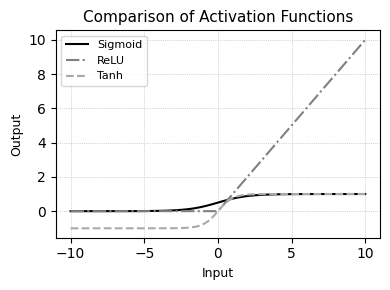

### **Number of Epochs: How Long Should the Model Learn?**  


The number of epochs determines how many times the entire training dataset is passed through the model during training. It’s like practicing a skill—more practice can lead to mastery, but overdoing it might cause burnout or overfitting.


#### **What Happens During an Epoch?**  
During one epoch, the model:
1. Processes the entire training dataset, divided into batches.  
2. Updates its weights using gradient descent for each batch.

The number of epochs determines how many times this process is repeated. A higher number of epochs allows the model to learn more, but it increases the risk of overfitting (performing well on the training data but poorly on unseen data).




#### **Range of Values and Trade-offs**
| **Epochs**       | **Effect**                            | **Pros**                          | **Cons**                          |
|-------------------|---------------------------------------|------------------------------------|-----------------------------------|
| **Low (e.g., 5)** | Limited learning; underfitting risk   | Faster training                   | May not capture data patterns     |
| **Optimal (e.g., 20-50)** | Balanced learning; generalizes well | Good trade-off between speed & accuracy | Requires careful tuning           |
| **High (e.g., 100+)** | Risk of overfitting                | Maximizes accuracy on training data | May lead to poor generalization   |



#### **Visualizing Its Effect**  
Imagine you train a model for different numbers of epochs:
- **Too Few Epochs:** The model underfits, as it hasn’t learned enough patterns from the data. Validation loss decreases slightly or stays high.  
- **Optimal Number of Epochs:** Training loss decreases steadily, and validation loss stabilizes, indicating good generalization.  
- **Too Many Epochs:** Validation loss increases after a certain point, while training loss keeps decreasing, showing overfitting.



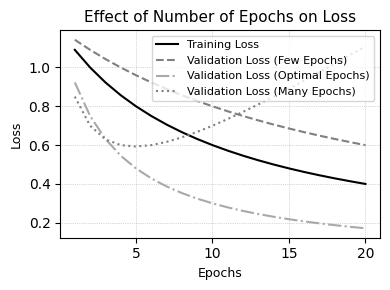

### **Optimizer: The Strategy for Learning**  


An optimizer determines how the model updates its weights during training to minimize the loss function. It defines the algorithm that drives gradient descent, making it one of the most crucial choices for training neural networks effectively.




#### **Mathematical Context**  
The optimizer updates weights based on the gradient of the loss function. The general weight update rule is:

$$
w^{t+1} = w^t - \eta \cdot \nabla L(w^t)
$$

Where:
- $w^t$: Weights at step $t$.  
- $\eta$: Learning rate.  
- $\nabla L(w^t)$: Gradient of the loss function at $w^t$.

Different optimizers modify this basic formula to improve performance. For example:

1. **Stochastic Gradient Descent (SGD):**  
   $$
   w^{t+1} = w^t - \eta \cdot \nabla L(w^t)
   $$
   - Simple and efficient but may converge slowly.

2. **Adam (Adaptive Moment Estimation):**  
   $$
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla L(w^t)
   $$
   $$
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla L(w^t))^2
   $$
   $$
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   $$
   $$
   w^{t+1} = w^t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
   $$
   - Combines momentum and adaptive learning rates for faster, more stable convergence.



#### **Range of Choices and Trade-offs**
| Optimizer  | Behavior                                    | Pros                              | Cons                              |
|------------|--------------------------------------------|-----------------------------------|-----------------------------------|
| **SGD**    | Simple gradient-based updates              | Easy to implement, computationally efficient | May converge slowly, sensitive to learning rate. |
| **Momentum** | Adds momentum to SGD to smooth updates    | Reduces oscillations, accelerates convergence | Requires tuning of momentum parameter. |
| **Adam**   | Combines momentum and adaptive learning rates | Fast convergence, good default for many tasks | May generalize poorly if not tuned. |
| **RMSprop** | Scales learning rate based on gradient magnitude | Handles noisy updates well       | May not perform well on all tasks. |



#### **Visualizing Its Effect**  
Imagine optimizing a loss function shaped like a bowl. Each optimizer takes a different path to reach the bottom:
- **SGD:** Takes steady, small steps, which may oscillate near the solution.  
- **Momentum:** Smooths oscillations by combining past gradients with the current one.  
- **Adam:** Adjusts step sizes adaptively, accelerating learning in some regions while slowing down in others.



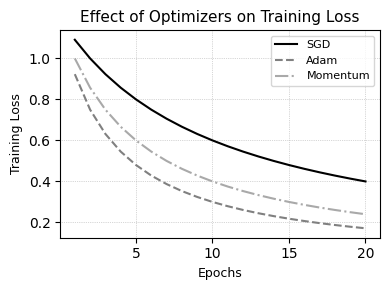

### **Architecture - Number of Hidden Layers and Neurons per Hidden Layer**



The **number of hidden layers** determines the **depth** of a neural network, while the **number of neurons per hidden layer** defines its **width**. Together, they shape the architecture and control the model’s ability to learn patterns and generalize. These two hyperparameters must be balanced to align with the task requirements and the chosen architecture.



#### **Why Do They Matter?**
1. **Depth:**  
   - More layers increase the model's ability to capture hierarchical features but can lead to overfitting or higher computational costs.  
   - Fewer layers result in simpler models that might underfit complex data.  
   - Depth is essential for defining architectural shapes like hourglass, pyramid, and cone.

2. **Width:**  
   - More neurons per layer increase the model’s capacity to represent features.  
   - Fewer neurons result in a simpler model but may miss fine-grained patterns.  
   - Width affects architectural shapes like the tapering of a pyramid or the bottleneck of an hourglass.




#### **How They Relate to Shapes**

| **Common Shapes**            | **Depth (Layers)** | **Example Width (Neurons per Layer)**          | **Common Use Cases**                                                                                     | **Examples**                                                                                     |
|-----------------------|--------------------|-----------------------------------------|----------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Hourglass**         | 3-5+                | 128 → 64 → 32 → 64 → 128               | Symmetric tasks, encoder-decoder pipelines, feature refinement                                           | U-Net, VAEs, GAN discriminators, DensePose                                                     |
| **Pyramid**           | 4-8+                | 256 → 128 → 64 → 32                    | Hierarchical feature extraction, dimensionality reduction                                                | CNNs, ResNet (early layers), Vision Transformers (preprocessing)                               |
| **Inverted Pyramid**  | 4-8+                | 32 → 64 → 128 → 256                    | Expanding representations, synthesis, reconstruction tasks                                              | GAN generators, VAE decoders, PixelCNNs                                                       |
| **Cone**              | 4-8+                | 256 → 192 → 128 → 96 → 64              | Progressive generative refinement, smooth transitions                                                   | GAN generators, Progressive GANs                                                               |
| **Cylinder**          | 2-6+                | 128 → 128 → 128 → 128                  | Sequential or temporal patterns, simple-to-moderate complexity                                          | RNNs, LSTMs, GRUs, Transformer encoders                                                       |



## **2. How Backpropagation Works**

Backpropagation is the process that allows a neural network to learn by calculating and propagating gradients through the network. Each hyperparameter listed below influences different parts of this process, shaping the efficiency and outcome of training.



#### **1. Forward Propagation**
- **What Happens:**  
  - The input data ($x \in \mathbb{R}^n$) is passed through the network layer by layer to produce a prediction ($\hat{y}$).
  - Each layer computes:  
    $$
    z_i = W_i \cdot a_{i-1} + b_i, \quad a_i = f_i(z_i)
    $$  
    - $z_i$: Weighted sum of inputs at layer $i$.  
    - $a_i$: Output after applying the activation function $f_i(z_i)$.  
    
- **Hyperparameters Involved:**  
  - Activation Functions
  - Number of Hidden Layers and Neurons per Hidden Layer


#### **2. Loss Calculation**
- **What Happens:**  
  - The loss function quantifies the error between the predicted output ($\hat{y}$) and the true target ($y$):  
    $$
    L = \text{Loss}(y, \hat{y})
    $$  
  - Examples:
    - **Cross-Entropy Loss** (classification tasks):  
      $$
      L = -\sum_{i=1}^k y_i \log(\hat{y}_i)
      $$  
    - **Mean Squared Error (MSE)** (regression tasks):  
      $$
      L = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
      $$  

- **Hyperparameters Involved:**  
  - Regularization


#### **3. Gradient Computation**
- **What Happens:**  
  - Gradients of the loss function are computed with respect to each parameter (weights $W_i$ and biases $b_i$) by applying the chain rule:
$$
\frac{\partial L}{\partial z_i} = \frac{\partial L}{\partial a_i} \cdot f_i'(z_i)
$$
  - For hidden layers:
$$
\frac{\partial L}{\partial z_i} = \left(\frac{\partial L}{\partial z_{i+1}} \cdot W_{i+1}^\top\right) \cdot f_i'(z_i)
$$  

- **Hyperparameters Involved:**  
  - Batch Size


#### **4. Weight and Bias Updates**
- **What Happens:**  
  - Using the gradients, weights and biases are updated to reduce the loss:  
$$
W_i^{t+1} = W_i^t - \eta \cdot \frac{\partial L}{\partial W_i}, \quad b_i^{t+1} = b_i^t - \eta \cdot \frac{\partial L}{\partial b_i}
$$  
    - $\eta$: Learning rate that controls the size of the updates.

- **Hyperparameters Involved:**  
  - Learning Rate
  - Optimizer


#### **5. Iterative Process**
- **What Happens:**  
  - Steps 1–4 are repeated for each batch across all epochs.  
  - The network gradually converges as backpropagation iteratively adjusts parameters.

- **Hyperparameters Involved:**  
  - Number of Epochs

## **3. For the Future: How and Why to Perform Ablations**

Ablation studies are a methodical approach to evaluating the importance of different parts of a model. By systematically removing or altering elements, ablations reveal how each contributes to the model’s overall performance, helping identify essential components and opportunities for simplification.

**Also, they are essential for your homework part 2s!**

To perform an ablation:
1. **Choose an Element to Test:** Select a specific part of the model to modify or remove.  
2. **Make the Change and Evaluate:** Implement the change, retrain the model under the same conditions, and measure its performance.  
3. **Analyze the Results:** Compare the modified model’s performance to the original to determine the significance of the tested element.

Ablation studies are essential because they provide insights into the inner workings of a model, ensuring designs are both effective and efficient.

# **Part 3: Practice with a Pipeline**

## Importing Essential Libraries

In [ ]:
# Import Deep-Learning-Specific Libraries
import torch
import torchvision
import tensorflow
from torchsummary import summary
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from tensorflow.keras.datasets import mnist
import wandb

# Import SciKit Learn for Additional Machine Learning Utilities
import sklearn
import sklearn.metrics

# Import MatPlotLib and TQDM for Visualizing Our Input Data and Training Loop Progress.
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

## Ensuring the device



In [ ]:
# Ensure We Are Running on a GPU.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", device)

# This check seems unimportant but if you didn't set up cuda before hand you'll have problems later. (This is done for you with colab and GCP but is a consideration for local)

Device:  cpu


## Data Loading and Preprocessing

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
class MNISTDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        image = self.data[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define transforms including normalization
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.unsqueeze(0)),  # Add a channel dimension (N, 1, H, W)
    transforms.Normalize((0.5,), (0.5,))          # Normalize to range [-1, 1] (mean=0.5, std=0.5)
])

In [ ]:
# Create instances of the dataset class
train_dataset = MNISTDataset(X_train, y_train, transform=transform)
test_dataset = MNISTDataset(X_test, y_test, transform=transform)

# Split the training dataset into train and validation sets
train_size = int(0.8 * len(train_dataset))  # 80% for training
val_size = len(train_dataset) - train_size  # Remaining 20% for validation
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Print dataset sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 48000
Validation set size: 12000
Test set size: 10000


In [ ]:
# Test DataLoader
for images, labels in train_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    break

## Data Visualisation

In [ ]:
# Get first training sample & label pair
for x, y in train_dataset:
  break

In [ ]:
NUM_CHANNELS, HEIGHT, WIDTH = x.shape
print("Number of channels: ", NUM_CHANNELS)
print("Image height: ", HEIGHT)
print("Image width: ", WIDTH)

In [ ]:
x.squeeze().shape

In [ ]:
npimg = x.numpy()
plt.imshow(npimg.squeeze())
plt.title(f"Digit {str(y)}")
plt.show()

## Model Development

### How to develop a Single Layer Neural Network?

### Architecture 1: Cylinder Architecture

### Architecture 2: Pyramid Architecture

## Training and Evaluation Loop

### Model Deployment and Training

# **Part 4: Hands-On Testing**

## **1. [Simple, Sample Ablation Sheet](https://docs.google.com/spreadsheets/d/1xJkX_1utAIbdQ72jESSDZAKeHGApidalCKesgNzjz-0/edit?usp=sharing)**


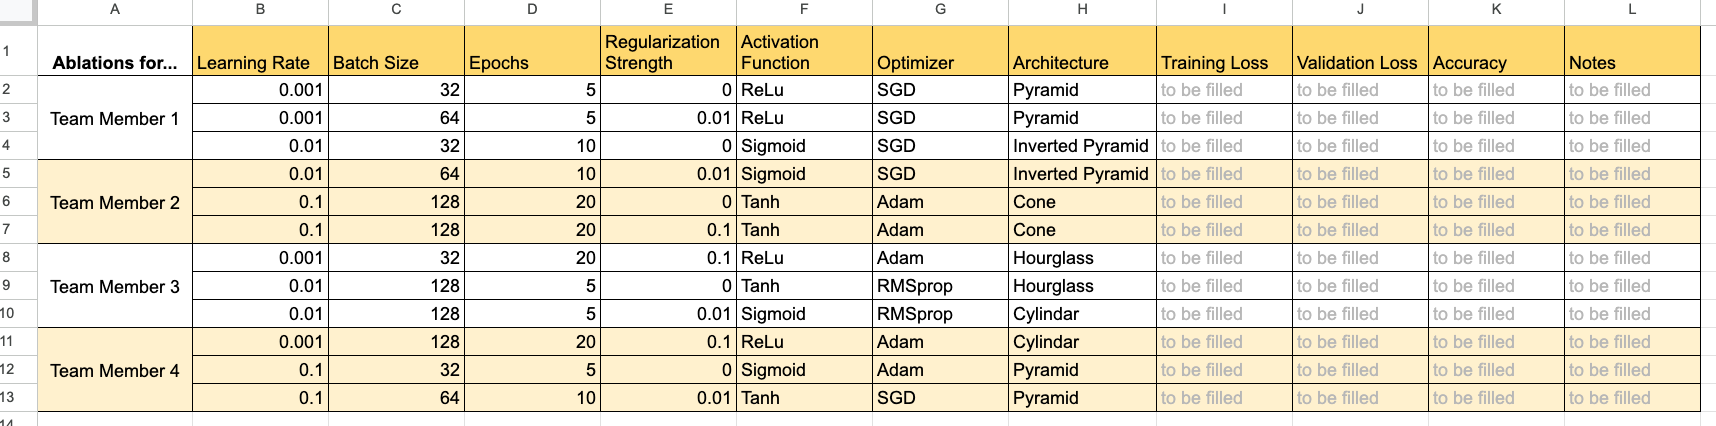

## **2. Group Activity**


1. Create a study group with your neighbor, just for today. (If you're on zoom, we will make break-out rooms.)
2. Assign each person specific parameters to test (e.g., learning rate, batch size).
  - You can use the sample ablation sheet we've linked above, just assign each group member to a set of ablations.
3. Each person records results in the ablation sheet.
4. Compare findings and discuss patterns observed.


## **3. Reflect on the Results**


After everyone has done their ablations, discuss:
- What changes improved performance the most?
- Were there unexpected results?


# **Bonus: Improving Neural Networks & General Reading**

### Optimizers


This section will discuss a few optimizers you may find useful going forward. Above we had used Adam, an extremely well explored optimizer which has many subsequent optimizers based on it. Among them for future homework you may find that the AdamW optimizer, or AdamP may be particularly interesting.


* AdamW's integrates weight decay, which makes it particularly suitable for complex models like CNNs, where it effectively helps in preventing overfitting, a common issue in such architectures. Weight decay works by gradually reducing the weights of the neurons in the network, encouraging simpler models and thus reducing overfitting.


* As for AdamP, it optimizes the model by adjusting the gradients in a way that is more sensitive to the structure of the data, potentially leading to more efficient and stable training.


* There is also the very classic approach of Stochastic Gradient Descent (SGD), which may prove to be a better optimizer in many cases, such as scenarios where simplicity and transparency in the optimization process are crucial. Unlike more complex optimizers, SGD relies on a straightforward update rule, which can be more interpretable and easier to debug. This makes it particularly effective in situations where the data is not excessively complex or when the model architecture is relatively simple. Moreover, SGD can sometimes escape local minima more effectively than algorithms like Adam, leading to better generalization in certain types of problems.



Below will be a few simple code snippet examples of implementations of AdamW, AdamP, and SGD using PyTorch. Documentation will be provided, which I encourge you to read as well as the original papers. Going forward, think critically about why you would select a specific optimizer when creating a network as though the ones mentioned prior perform well generally, the small differences could help significantly in squeezing that last bit of performance out of a model.

In [ ]:
# Adam: The classic Adam Optimizer
optimizer   = torch.optim.Adam(___, ___) # https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam

# AdamW: Notice when reading the pytorch documentation that AdamW allows a weight decay variable. This often improves performance by applying a form of regularization
optimizer   = torch.optim.AdamW(___, ___, ___) # https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.AdamW


!pip3 install adamp

from adamp import AdamP

# AdamP: AdamP is a bit more fiddly as it is not natively included in torch and you must import it like above, or write it yourself

optimizer   = AdamP(___, ___) # Link: https://pypi.org/project/adamp/


# SGD: The classic SGD optimizer

optimizer   = torch.optim.SGD(___)  # Link: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

"""
PAPERS:

Adam:   https://arxiv.org/abs/1412.6980   "Adam: A Method for Stochastic Optimization"
AdamW:  https://arxiv.org/abs/1711.05101  "AdamW: Decoupled Weight Decay Regularization"
AdamP:  https://arxiv.org/abs/2006.08217  "AdamP: Slowing Down the Slowdown for Momentum Optimizers on Scale-invariant Weights"

SGD is well explored enough that this paper is included to discuss momentum. Read if you are interested, this topic may appear later.
SGD:    https://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf
"""

### Dropout

Dropout is a regularization technique used to prevent overfitting in neural networks. It works by randomly deactivating a subset of neurons during training, forcing the network to learn more robust features that are not reliant on any specific set of neurons, thus enhancing the model's generalization ability. Dropout is an extremely useful tool that you can find yourself using very often and will be very helpful in future assignments. You may even find it useful to tune dropout between epochs sometimes.


In [ ]:
"""
Please either create a network or fill in from earlier but with a dropout layer. Dropout is another tool that will show up
continually as you study deep learning. It is prolific and often takes other forms such as Drop Blocks and Drop Paths. The general concept for
what it does and the intuition is generally consistent however. Below implement the network using dropout. Documentation is provided below.

Dropout:                https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout
"""

# Define your network (Feel free to create your networks)
model_1 = torch.nn.Sequential(

  torch.nn.____, # Declare your first linear layer. What should the input and output size be?

  torch.nn.____, # Insert your dropout layer

  torch.nn.____, # Declare your activation function


  # Add any additional layers here if you would like before the final layer


  torch.nn.____  # Declare your final linear layer that outputs the OUT_SIZE
)

# Move the model to device. This step is required before training
model_1 = model_1.to(device)

summary(model_1, x.flatten().shape)

###Batch Normalization

Batch normalization (BatchNorm) is a technique used to improve the speed, performance, and stability of neural networks. It works by normalizing the inputs of each layer, ensuring that they have a mean of zero and a standard deviation of one, which helps to mitigate issues related to poor initialization and helps in faster convergence.

BatchNorm though seeming to be quite a minor detail offers a significant impact on your network on more complex problems and can prove invaluable as an initial first step to improve your network. Below will be an example using code from before. Fill in with your neural network but this time, include batchnorm. This structure will be very helpful and repeat itself on future homeworks.

In [ ]:
"""
Please either create a network or fill in from earlier but with the correct values for batchnorm. Note that
batchnorm needs to take in the size of the current prior layer to work. Usually this is done either
before an activation or after and for each layer. Documentation is provided below.

Batchnorm:              https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html#torch.nn.BatchNorm1d

"""

# Define your network (Feel free to create your networks)
model_1 = torch.nn.Sequential(

  torch.nn.____, # Declare your first linear layer. What should the input and output size be?

  torch.nn.____, # Apply batch normalization

  torch.nn.____, # Declare your activation function


  # Add any additional layers here if you would like before the final layer


  torch.nn.____  # Declare your final linear layer that outputs the OUT_SIZE
)

# Move the model to device. This step is required before training
model_1 = model_1.to(device)

summary(model_1, x.flatten(start_dim=0).to(device))

### Schedulers

Schedulers are tools used in training neural networks to adjust the learning rate during training, which can lead to more effective and efficient optimization. There are many viable options in this regard, including writing your own, but you may find ReduceLROnPlateau or CosineAnnealingLR especially useful.

* ReduceLROnPlateau works by monitoring a specified metric (like validation loss) and reducing the learning rate when this metric stops improving. Essentially, it implements a form of learning rate decay; if the model's performance plateaus, the learning rate decreases, which can help to escape local minima and continue learning.

* CosineAnnealingLR works by adjusting the learning rate following a cosine curve. This means the learning rate starts high, decreases to a minimum, and then increases again. This approach can help in navigating the loss landscape more effectively by allowing the model to explore more during the periods of higher learning rates and refine its understanding of the data during the periods of lower learning rates.

In [ ]:
# All optimizers built into Torch: https://pytorch.org/docs/stable/optim.html

# ReduceLRonPlateau
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, ___) # https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html#torch.optim.lr_scheduler.ReduceLROnPlateau

# CosineAnnealingLR
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, ___) # https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.CosineAnnealingLR.html#torch.optim.lr_scheduler.CosineAnnealingLR


"""
PAPERS:
CosineAnnealingLR: https://arxiv.org/abs/1608.03983
"""
